# Principal Component Analysis (PCA)



In this notebook we will be going over the **Principal Component Analysis** without much focus on the theory just mentioning it lightly, for the full theory and linear algbera interpretation of **PCA** check the **Dimension Reduction** Folder in the github repo.

In [70]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA steps : 
1. Centering the data by substracting off the mean from each observation $X-\bar{X}$
2. Calculate the **SVD** or the **eigenvectors** of the covariance matrix which represent the **principal Componenets**(handled by `sklearn`)
3. Calculate the principal Componenets Scores (Projecting Data onto the new axes) 

## Feature Scaling 

In [71]:
X = np.array([[1,3,2],[5,1,3],[22,3,5],[13,21,0],[2,4,10],[9,11,1]])
X

array([[ 1,  3,  2],
       [ 5,  1,  3],
       [22,  3,  5],
       [13, 21,  0],
       [ 2,  4, 10],
       [ 9, 11,  1]])

In [72]:
X_centered = StandardScaler().fit_transform(X)
X_centered

array([[-1.06091089, -0.60053832, -0.45398995],
       [-0.50739216, -0.88879672, -0.15132998],
       [ 1.84506242, -0.60053832,  0.45398995],
       [ 0.59964529,  1.99378723, -1.05930987],
       [-0.92253121, -0.45640913,  1.96728976],
       [ 0.04612656,  0.55249526, -0.75664991]])

- Now our data is **Standardized** with mean $\mu=0$ and standard deviation $\sigma=1$
- It Centers data around the **mean**
- Preserves the **relationships** between the data points
- Changes the shape of the original **distribution** 

In [73]:
X_centered.shape

(6, 3)

- Our data set has $n=6$ observations and $p=3$, keep it in mind sine the **PCA** will reduce the dimensionality of this matrix to be more intrepretable and easy to visualize

## Fitting PCA

In [74]:
pca_one_dim = PCA(n_components=1,svd_solver='full')
pca_two_dim = PCA(n_components=2,svd_solver='full')
pca_one_dim.fit(X_centered)
pca_two_dim.fit(X_centered);

In [75]:
pca_one_dim

,n_components,1
,copy,True
,whiten,False
,svd_solver,'full'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [76]:
pca_two_dim

,n_components,2
,copy,True
,whiten,False
,svd_solver,'full'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


- Here we gonan fit two **PCA** instances for one dimension and for two dimension represented by `n_components` which where our data will be projected onto
- Using the `svd_solver='full'` since **PCA** is simply a statistical intrepretation of **Singular Value Decomposition** 
- 

In [77]:
print(pca_one_dim.explained_variance_ratio_)

[0.56540338]


In [78]:
print(pca_two_dim.explained_variance_ratio_)

[0.56540338 0.28706397]


- **Explained Variance** a very important thing to notice while performing **PCA** since it shows:
    - How much each component explain the variance in the original data
    - The first component explains around $56\%$ of the variance
    - While the Second component explain only $28.7\%$ of the variance 

In [79]:
pca_three_dim = PCA(n_components=3,svd_solver='full')
pca_three_dim.fit(X_centered);
print(pca_three_dim.explained_variance_ratio_)

[0.56540338 0.28706397 0.14753265]


- As a stupid experiment but also good for intuition setting the `n_components=3` which is original dimension of our data set matrix `X`
- We can notice that the variance adds up to $100\%$ across all principal componenets
- They are ordered from the most important $\to$ the one that explains the maximum variance in the orignal data `X`

## Projecting the Data 

After finding the principal componenets of our data `X`, Now time to project or transform the data into the new axes(PCs) 

In [80]:
X_pca1 = pca_one_dim.transform(X_centered)
X_pca2 = pca_two_dim.transform(X_centered)
X_centered

array([[-1.06091089, -0.60053832, -0.45398995],
       [-0.50739216, -0.88879672, -0.15132998],
       [ 1.84506242, -0.60053832,  0.45398995],
       [ 0.59964529,  1.99378723, -1.05930987],
       [-0.92253121, -0.45640913,  1.96728976],
       [ 0.04612656,  0.55249526, -0.75664991]])

In [81]:
X_pca1

array([[-0.55391039],
       [-0.70137916],
       [ 0.09309616],
       [ 2.22506797],
       [-1.9196134 ],
       [ 0.85673882]])

In [82]:
X_pca2

array([[-0.55391039, -1.01237857],
       [-0.70137916, -0.3393901 ],
       [ 0.09309616,  1.95429003],
       [ 2.22506797, -0.27135082],
       [-1.9196134 ,  0.03358522],
       [ 0.85673882, -0.36475575]])

- These values are the projected coordinates or **Principal Components Scores** 

## Visualization 

One of the most important uses of **PCA** is visualization since we can't plot data with dimension more than 3 or 4 if we wanna stretch it, So **PCA** provide an sophesticated method to represent it in a lower dimensions 

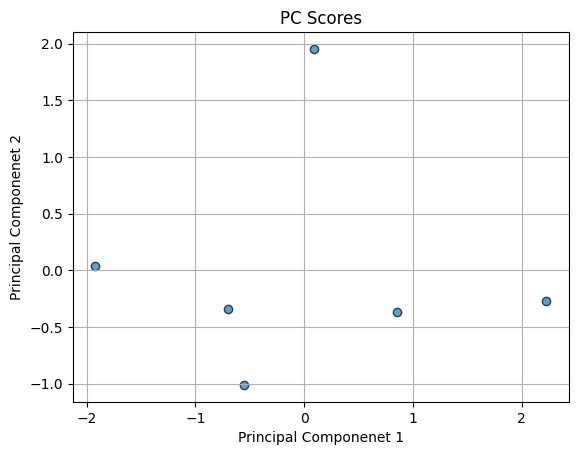

In [86]:
plt.scatter(X_pca2[:,0],X_pca2[:,1], alpha=0.7 ,edgecolors='k')
plt.xlabel('Principal Componenet 1')
plt.ylabel('Principal Componenet 2')
plt.title('PC Scores')
plt.grid(True)
plt.show();